In [57]:
import pandas as pd
from datetime import timedelta
import datetime as dt
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [58]:
data = pd.read_csv('bedoccupancy.csv',
                   parse_dates=['ADMISSION_DATE_TIME', 'DISCHARGE_DATE_TIME'])

data = data.rename(columns={"Resident_Service.NAME": "residence", 
                     "ADMISSION_DATE_TIME": "ad_date_time",
                     "DISCHARGE_DATE_TIME": "dis_date_time"})

In [59]:
data.head()

,StudyID,residence,ad_date_time,dis_date_time
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00


## Length of Stay

In [60]:
data['los'] = data['dis_date_time']-data['ad_date_time']
data['los'] = data['los']/np.timedelta64(24,'h')

In [61]:
data.head()

,StudyID,residence,ad_date_time,dis_date_time,los
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,2.593750
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,16.761111
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,2.524306
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,3.529167
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,7.475694


In [62]:
data['idx'] = pd.to_datetime(data['ad_date_time'])
data = data.set_index('idx')
data.head()

,StudyID,residence,ad_date_time,dis_date_time,los
idx,,,,,
2014-04-01 02:15:00,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,2.593750
2014-04-01 04:21:00,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,16.761111
2014-04-01 04:30:00,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,2.524306
2014-04-01 04:30:00,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,3.529167
2014-04-01 07:50:00,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,7.475694


In [84]:
aux_1 = data['ad_date_time'].values
aux_2 = data['dis_date_time'].values

vaux_1 = np.ones(len(aux_1))
vaux_2 = -1*np.ones(len(aux_2))

aux = np.concatenate([aux_1, aux_2])
vaux = np.concatenate([vaux_1,vaux_2])

sort = np.argsort(aux)

aux = aux[sort]
vaux = vaux[sort]
bo = np.cumsum(vaux)

In [85]:
aux_dic = {'dates': aux, 'ad_dis': vaux, 'bo': bo}
df = pd.DataFrame.from_dict(aux_dic)
df = df.set_index('dates')

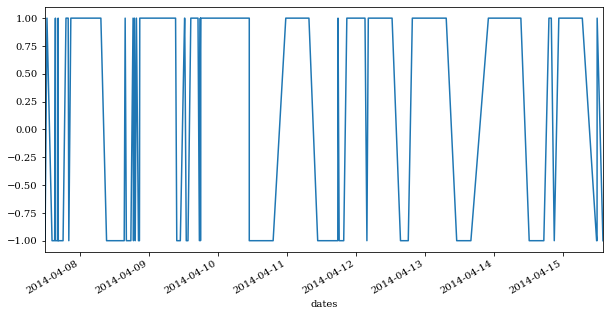

In [90]:
plt.figure(figsize=(10,5))
df['ad_dis'].iloc[100:300].plot()
plt.show()

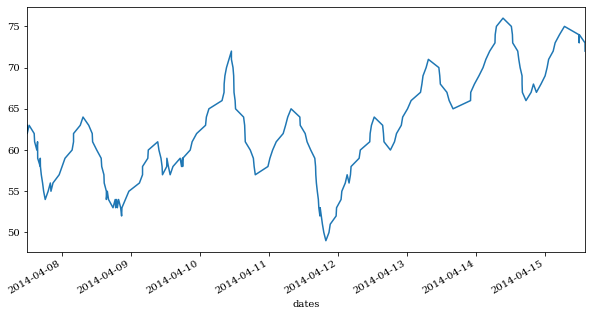

In [91]:
plt.figure(figsize=(10,5))
df['bo'].iloc[100:300].plot()
plt.show()